In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *


def display_categorical_features(df, thresh=10):
    """データを最初にここに通して質的変数の確認を行う"""
    unique_count = df.select_dtypes('object').apply(pd.Series.nunique, axis=0)
    for idx in unique_count.index:
        if unique_count[idx] <= thresh:
            print(f"{idx}\t{unique_count[idx]}\t{df[idx].unique()}")
        else:
            print(f"{idx}\t{unique_count[idx]}")

In [2]:
df = pd.read_csv("train_processed.csv").drop(["dateid"], axis=1)
display_categorical_features(df)

week	5	['Tue' 'Wed' 'Thu' 'Fri' 'Mon']
name	213
remarks	7	[nan 'お楽しみメニュー' 'こだわりメニュー' 'スペシャルメニュー' '近隣に飲食店複合ビルオープン' 'イチオシ' 'コンビニ改装'
 '弁当種類増↓']
event	2	[nan 'ママの会' 'キャリアアップ支援セミナー']
weather	62


In [63]:
exp = setup(df, target="y", session_id=1873, log_experiment=True, experiment_name="mufg")

,Description,Value
0,session_id,1873
1,Target,y
2,Original Data,"(337, 42)"
3,Missing Values,True
4,Numeric Features,3
5,Categorical Features,38
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(235, 255)"


In [64]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,10.7498,212.4143,14.1757,0.3441,0.2228,0.1789,0.0210
rf,Random Forest Regressor,10.4739,216.3849,14.1687,0.2972,0.2233,0.1740,0.1620
br,Bayesian Ridge,11.2960,221.2290,14.6634,0.2962,0.2301,0.1937,0.0120
lasso,Lasso Regression,11.6372,239.0259,15.2609,0.2652,0.2353,0.1987,0.0050
xgboost,Extreme Gradient Boosting,11.5036,237.4476,15.1078,0.2359,0.2375,0.1975,0.0650
gbr,Gradient Boosting Regressor,10.9407,229.3864,14.7721,0.2319,0.2290,0.1864,0.0240
ridge,Ridge Regression,11.4047,239.2362,15.2094,0.2271,0.2433,0.1977,0.0050
lightgbm,Light Gradient Boosting Machine,11.8960,249.2102,15.5851,0.2119,0.2465,0.2075,0.0090
huber,Huber Regressor,11.6488,250.2724,15.5125,0.1328,0.2437,0.1953,0.0120
en,Elastic Net,13.0841,323.5393,17.6587,0.0703,0.2605,0.2185,0.0050


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=1873)

In [72]:
# model = create_model("rf")
# model = create_model("br")
# model = create_model("lasso")
# model = create_model("ridge")
# model = create_model("gbr")
model = create_model("xgboost")
# model = create_model("lightgbm")
# model = create_model("ada")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,12.5227,213.5032,14.6117,0.3564,0.2772,0.2637
1,13.9592,367.7456,19.1767,-0.0138,0.2876,0.2236
2,10.9406,186.3772,13.6520,0.2653,0.2308,0.2046
3,9.7172,138.1795,11.7550,0.0458,0.1704,0.1472
4,13.3666,318.6726,17.8514,-0.0603,0.3189,0.2812
5,7.0044,79.8203,8.9342,0.7982,0.1401,0.1069
6,14.2909,336.4292,18.3420,-0.1180,0.2609,0.2013
7,11.3724,288.1498,16.9750,0.5574,0.2238,0.1686
8,10.7151,253.8699,15.9333,-0.1414,0.2242,0.1712


In [73]:
print(model)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100,
             n_jobs=-1, num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=1873, reg_alpha=0, ...)


In [74]:
tuned_model = tune_model(model, optimize="RMSE")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11.5647,190.1462,13.7894,0.4268,0.2688,0.2510
1,14.2354,390.5597,19.7626,-0.0767,0.2993,0.2314
2,13.8576,282.7335,16.8147,-0.1145,0.2785,0.2542
3,9.5207,165.8740,12.8792,-0.1454,0.1761,0.1401
4,12.9829,320.9447,17.9149,-0.0678,0.3154,0.2704
5,6.7002,93.5891,9.6741,0.7634,0.1276,0.0973
6,13.5528,312.3306,17.6729,-0.0379,0.2571,0.1898
7,11.0258,300.9270,17.3472,0.5378,0.2232,0.1565
8,9.2878,154.7681,12.4406,0.3042,0.2008,0.1532


In [75]:
predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,11.6686,236.9475,15.3931,0.5628,0.2323,0.1948


,kcal,precipitation,temperature,week_Fri,week_Mon,week_Thu,week_Tue,week_Wed,soldout_1,name_えびフライ,...,ingredient_noodle_1.0,ingredient_other_not_available,cook_yaki_not_available,cook_ni_not_available,cook_age_not_available,cook_itame_1.0,cook_curry_not_available,cook_other_1.0,y,Label
0,418.000000,0.0,28.500000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,65.0,58.333054
1,340.000000,0.0,14.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,92.0,72.457497
2,420.742981,0.0,9.300000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,118.0,117.999847
3,362.000000,1.5,25.299999,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,54.0,64.387314
4,425.000000,0.0,7.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,63.0,60.069916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,430.000000,0.0,4.700000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,60.0,70.537010
98,325.000000,0.5,11.800000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,56.0,96.092529
99,430.000000,52.0,17.500000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,104.0,70.261795
100,420.742981,0.0,16.700001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,71.0,69.337830


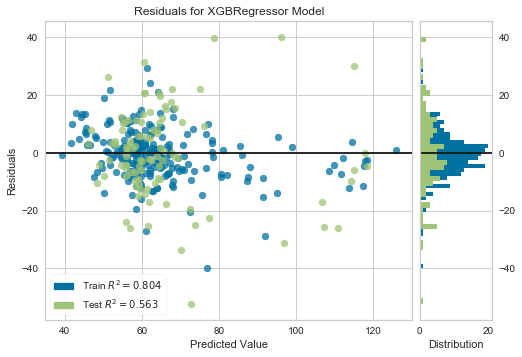

In [76]:
plot_model(tuned_model)

In [53]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [70]:
final_model = finalize_model(tuned_model)

In [71]:
df_pred = pd.read_csv("test_processed.csv")
df_dateid = df_pred["dateid"]
df_pred = df_pred.drop(["dateid"], axis=1)
df_pred = predict_model(final_model, data=df_pred)
df_submit = pd.concat([df_dateid, df_pred["Label"]], axis=1)
df_submit.columns = ["dateid", "y"]
df_submit.to_csv("submit.csv", index=False, header=False)